# Annealing Weight Decay

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def f():
    return lambda x: np.tanh(10 * x) + 6 * np.random.normal(0, 0.1, size=x.shape)

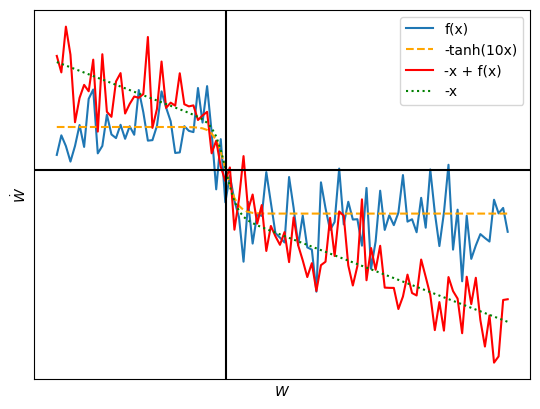

In [4]:
g = f()
X = np.linspace(-1.5, 2.5, 100)
plt.plot(X, -g(X), label='f(x)')
plt.plot(X, -np.tanh(10 * X), label='-tanh(10x)', linestyle='--', color='orange')
plt.plot(X, -X - g(X), label='-x + f(x)', linestyle='-', color='red')
plt.plot(X, -X - np.tanh(10 * X), label='-x', linestyle=':', color='green')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xticks([])
plt.yticks([])
plt.xlabel('$W$')
plt.ylabel('$\dot{W}$')
plt.legend()
plt.show()

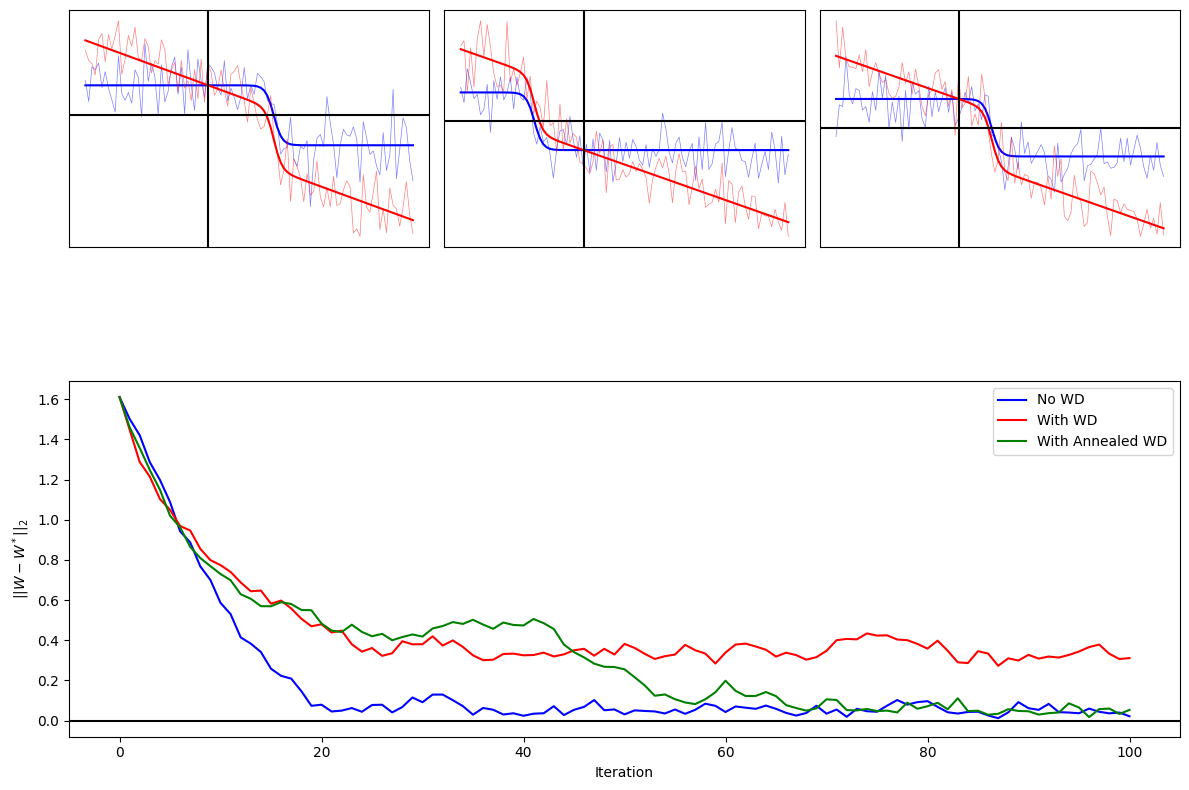

In [6]:
optimal_weight = np.array((0.8, -0.6, 0.4))
f1 = f()
f2 = f()
f3 = f()

# Make a 2x3 grid, but have the bottom row be a single plot and have this plot twice as tall as the first row
fig, axs = plt.subplots(2, 3, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 2]})
axs[1,0].remove()
axs[1,1].remove()
axs[1,2].remove()
axs[1] = fig.add_subplot(2, 1, 2)

# Plot the first row
for i in range(3):
    if i == 0:
        g = f1
    elif i == 1:
        g = f2
    else:
        g = f3
    axs[0, i].plot(X, -g(X-optimal_weight[i]), color='blue', alpha=0.5, linewidth=0.5)
    axs[0, i].plot(X, -np.tanh(10 * (X-optimal_weight[i])), color='blue', linestyle='-')
    axs[0, i].plot(X, -X  -g(X-optimal_weight[i]), color='red', alpha=0.5, linewidth=0.5)
    axs[0, i].plot(X, -X - np.tanh(10 * (X-optimal_weight[i])), color='red', linestyle='-')
    axs[0, i].axhline(0, color='black')
    axs[0, i].axvline(0, color='black')
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])

# Plot the second row
def norm(w, optimal_weight):
    return np.linalg.norm(w - optimal_weight, ord=2)

axs[1][0].axhline(0, color='black')

def update_step(w, l, eta):
    step = (f1(w[0] - optimal_weight[0]), 
            f2(w[1] - optimal_weight[1]), 
            f3(w[2] - optimal_weight[2]))
    return w - eta * np.array(step) - l * w

w_trajectory = []
w_wd_trajectory = []
w_awd_trajectory = []
init_weights = 0.25 * np.random.normal(size=(3,))

w_trajectory.append(init_weights.copy())
w_wd_trajectory.append(init_weights.copy())
w_awd_trajectory.append(init_weights.copy())
for i in range(100):
    wd = 0.1
    lr = 0.05
    w_trajectory.append(update_step(w_trajectory[-1], 0.0, lr))
    w_wd_trajectory.append(update_step(w_wd_trajectory[-1], wd, lr))

    if i < 33:
        awd = wd
    elif i < 66:
        awd = wd * (1 - (i - 33) / 33)
    else:
        awd = 0.0

    w_awd_trajectory.append(update_step(w_awd_trajectory[-1], awd, lr))

w_norms = [norm(w, optimal_weight) for w in w_trajectory]
w_wd_norms = [norm(w, optimal_weight) for w in w_wd_trajectory]
w_awd_norms = [norm(w, optimal_weight) for w in w_awd_trajectory]

axs[1][0].plot(w_norms, label='No WD', color='blue')
axs[1][0].plot(w_wd_norms, label='With WD', color='red')
axs[1][0].plot(w_awd_norms, label='With Annealed WD', color='green')
axs[1][0].legend()

axs[1][0].set_xlabel('Iteration')
axs[1][0].set_ylabel('$||W - W^*||_2$')

plt.tight_layout()
plt.show()

In [55]:
print(norm(optimal_weight, optimal_weight))

0.0


In [56]:
print(w_trajectory[-1])

[ 0.00225875 -0.00302063 -0.00857962]


In [57]:
print(w_wd_trajectory[-1])

[-0.02187089  0.00161444 -0.01448021]
